# Analyzing the rent price at Brazil

### At first, It will be done a exploratory analysis, plotting and checking stats' data. In a future notebook will be build a predictor model

In [1]:
#Importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("Dark2_r")

### Columns description
**city:** Cidade onde o imóvel está localizada / City where the property is located <br>
**area:** Area do imovel / Property area<br>
**rooms:** Numero de quartos/ Quantity of rooms<br>
**bathroom:** Numero de banheiros / Quantity of bathroom<br>
**parking spaces:** Numero de vagas / Quantity of parking spaces<br>
**floor:** Andar / Floor<br>
**animal:** Aceita animais? / Acept animals?<br>
**furnitur:** eMobilhada? / Furniture?<br>
**hoa:** Valor do condominio / Homeowners association tax<br>
**rent amount:** Valor do Aluguel / Rent amount<br>
**property tax:** IPTU / Property tax<br>
**fire insurance:** Seguro Incendio / Fire Insurance<br>
**total:** Valor total / Total<br>

#### Checking both datasets

In [2]:
df1 = pd.read_csv('/kaggle/input/brasilian-houses-to-rent/houses_to_rent.csv', index_col = 0)
df2 = pd.read_csv('/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv')

In [3]:
print(df1.head())
print('------------------------------------------------------')
print(df2.head())

   city  area  rooms  bathroom  parking spaces floor     animal  \
0     1   240      3         3               4     -      acept   
1     0    64      2         1               1    10      acept   
2     1   443      5         5               4     3      acept   
3     1    73      2         2               1    12      acept   
4     1    19      1         1               0     -  not acept   

       furniture      hoa rent amount property tax fire insurance     total  
0      furnished      R$0     R$8,000      R$1,000          R$121   R$9,121  
1  not furnished    R$540       R$820        R$122           R$11   R$1,493  
2      furnished  R$4,172     R$7,000      R$1,417           R$89  R$12,680  
3  not furnished    R$700     R$1,250        R$150           R$16   R$2,116  
4  not furnished      R$0     R$1,200         R$41           R$16   R$1,257  
------------------------------------------------------
           city  area  rooms  bathroom  parking spaces floor     animal  \

#### Considering that the first dataset have values 0 or 1 for the city column, I will make my analysis at the second dataset

In [4]:
df = df2.copy()
print('Printing dataset`s info\n')
print(df.info())
print('-----------------------------------------------')
print('Checking the quantity of null values\n')
print(df.isna().sum())

Printing dataset`s info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB
None
-----------------------------------------------
Checking the quantity of null values

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0

#### There isn't missing values! However, the number of the floor is categorical, Let's chance to numeric.

In [5]:
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


#### There is some "-" values

In [6]:
df[df['floor'].str.contains('\-')==True]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
15,Campinas,330,4,6,6,-,acept,furnished,680,8000,328,121,9129
19,São Paulo,600,4,5,6,-,acept,not furnished,0,12000,9500,181,21680
20,São Paulo,100,7,4,0,-,acept,not furnished,0,3800,118,58,3976
23,São Paulo,35,1,1,0,-,acept,not furnished,0,1100,3,14,1117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10659,Campinas,150,3,2,4,-,acept,furnished,0,3500,186,53,3739
10661,Campinas,250,1,2,2,-,acept,not furnished,0,2200,602,34,2836
10668,São Paulo,24,1,1,0,-,acept,not furnished,0,870,0,14,884
10674,Rio de Janeiro,135,4,2,1,-,acept,not furnished,0,3300,115,51,3466


In [7]:
print('Checking the mode for each column')
df.mode()

Checking the mode for each column


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,50,3,1,1,-,acept,not furnished,0,2500,0,16,2555


In [8]:
print('Checking the values quantity\n')
print(df.floor.value_counts())

Checking the values quantity

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
35        1
301       1
51        1
46        1
Name: floor, dtype: int64


#### The dataset owner not specified what means the - values, so I will assume that is a place with the lower number of floor, that is 1 floor

In [9]:
df['floor'].replace(to_replace=r'\-', value=1, regex=True, inplace = True)
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,1,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [10]:
df[df['floor'].str.contains('\-')==True]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)


#### It's work!

In [11]:
#Transform floor to integer
df = df.astype({'floor': 'int64'})
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,1,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [12]:
df.describe().round(2)

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,5.30,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,5.89,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,1.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,1.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,3.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,8.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,301.00,1117000.00,45000.00,313700.00,677.00,1120000.00


### Plotting

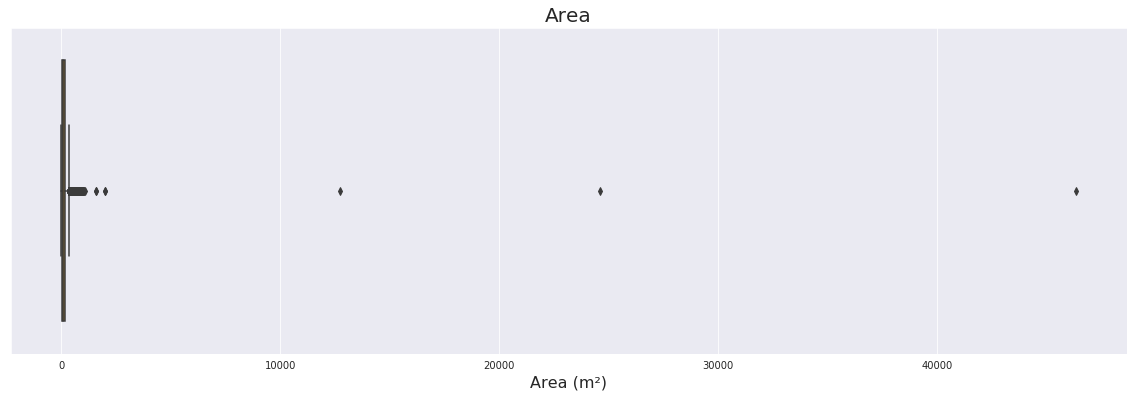

In [13]:
ax = sns.boxplot(df['area'])
ax.figure.set_size_inches(20,6)
ax.set_title('Area', fontsize=20)
ax.set_xlabel('Area (m²)', fontsize=16)
ax;

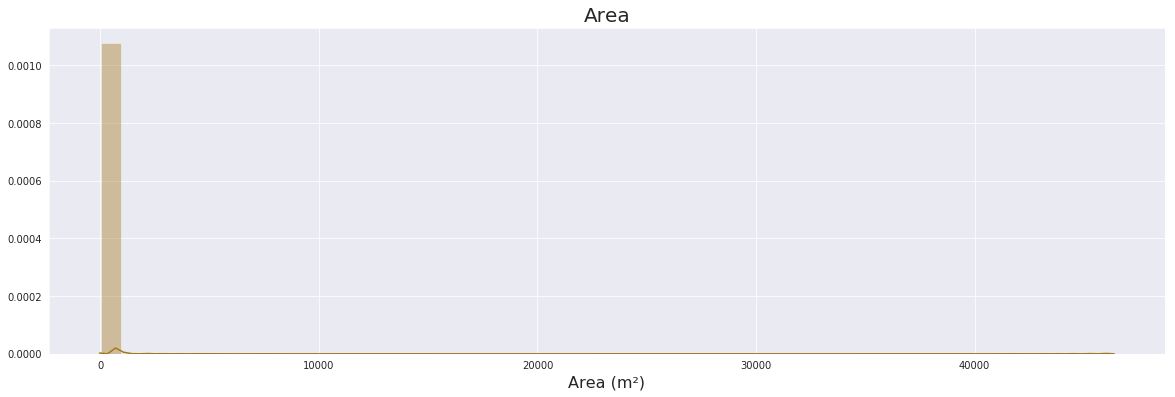

In [14]:
ax = sns.distplot(df['area'])
ax.figure.set_size_inches(20,6)
ax.set_title('Area', fontsize=20)
ax.set_xlabel('Area (m²)', fontsize=16)
ax;

#### It's seen there is some outliers at the area column

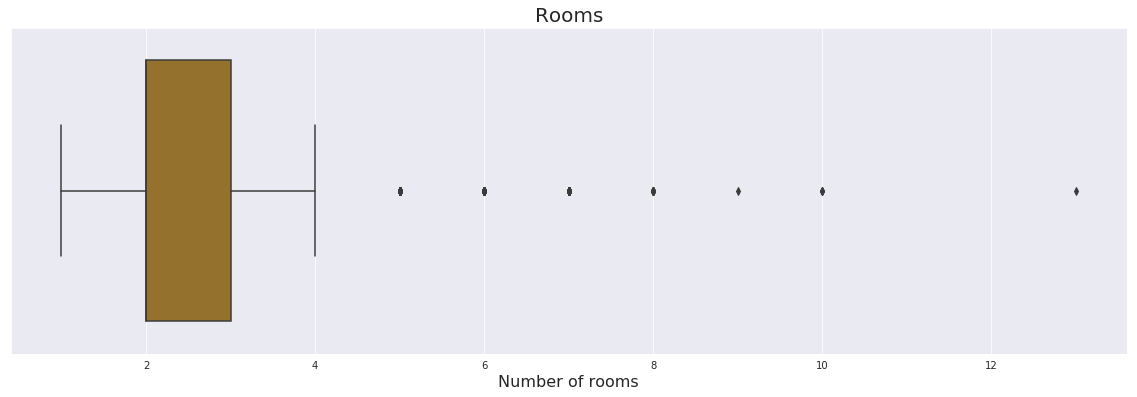

In [15]:
ax = sns.boxplot(df['rooms'])
ax.figure.set_size_inches(20,6)
ax.set_title('Rooms', fontsize=20)
ax.set_xlabel('Number of rooms', fontsize=16)
ax;

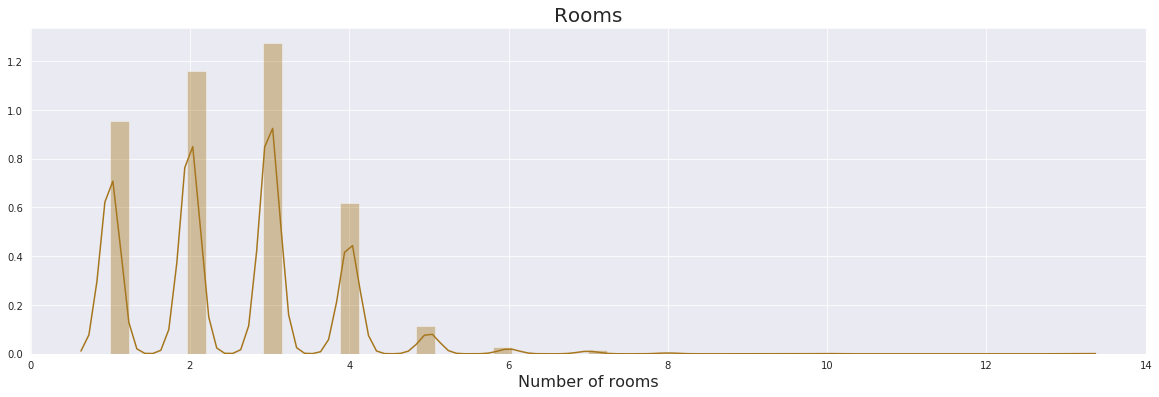

In [16]:
ax = sns.distplot(df['rooms'])
ax.figure.set_size_inches(20,6)
ax.set_title('Rooms', fontsize=20)
ax.set_xlabel('Number of rooms', fontsize=16)
ax;

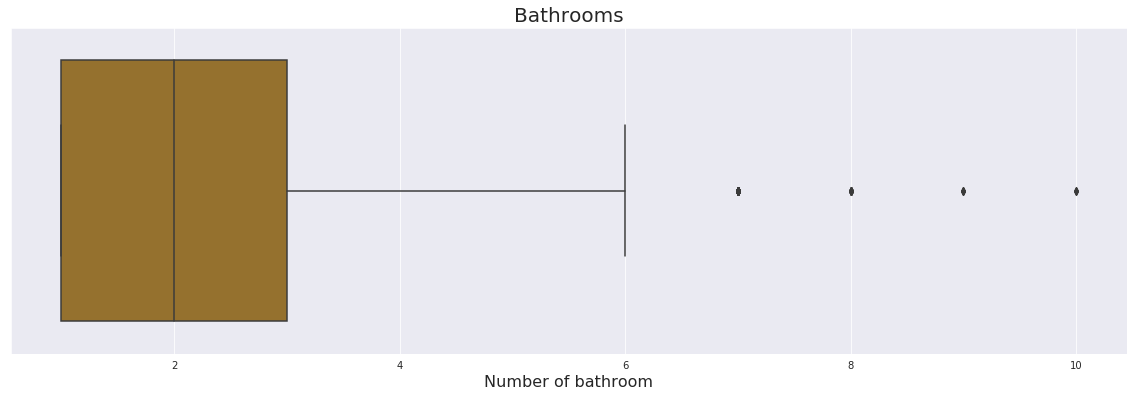

In [17]:
ax = sns.boxplot(df['bathroom'])
ax.figure.set_size_inches(20,6)
ax.set_title('Bathrooms', fontsize=20)
ax.set_xlabel('Number of bathroom', fontsize=16)
ax;

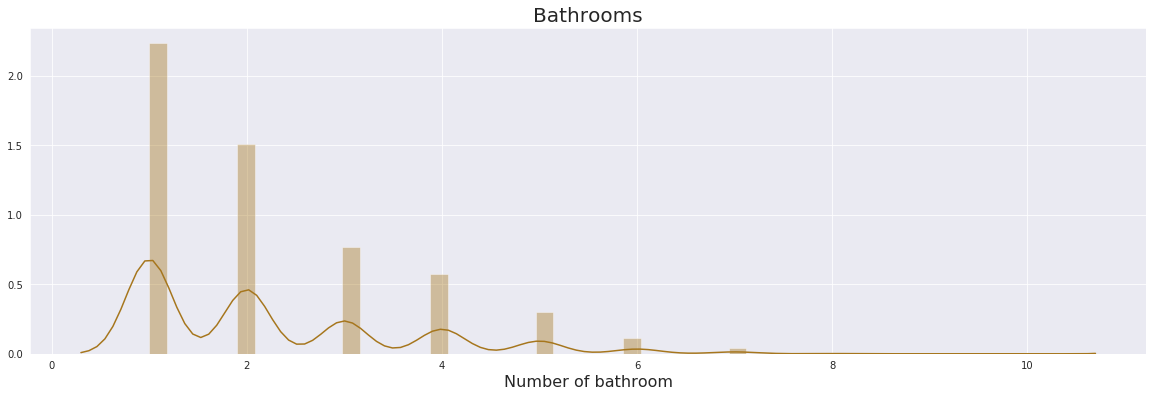

In [18]:
ax = sns.distplot(df['bathroom'])
ax.figure.set_size_inches(20,6)
ax.set_title('Bathrooms', fontsize=20)
ax.set_xlabel('Number of bathroom', fontsize=16)
ax;

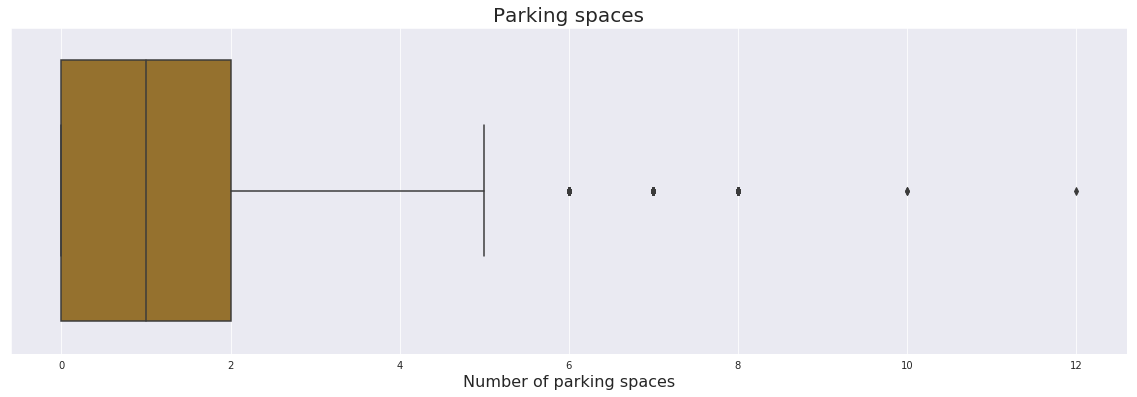

In [19]:

ax = sns.boxplot(df['parking spaces'])
ax.figure.set_size_inches(20,6)
ax.set_title('Parking spaces', fontsize=20)
ax.set_xlabel('Number of parking spaces', fontsize=16)
ax;

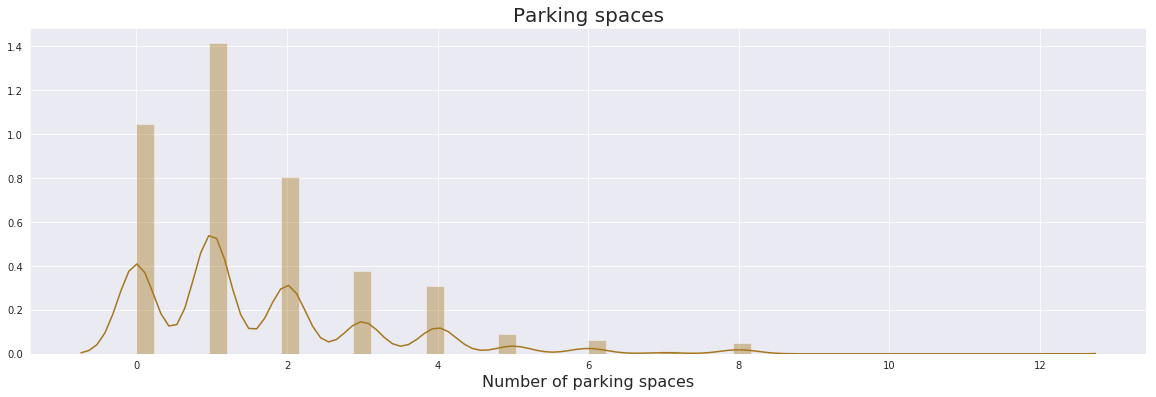

In [20]:
ax = sns.distplot(df['parking spaces'])
ax.figure.set_size_inches(20,6)
ax.set_title('Parking spaces', fontsize=20)
ax.set_xlabel('Number of parking spaces', fontsize=16)
ax;

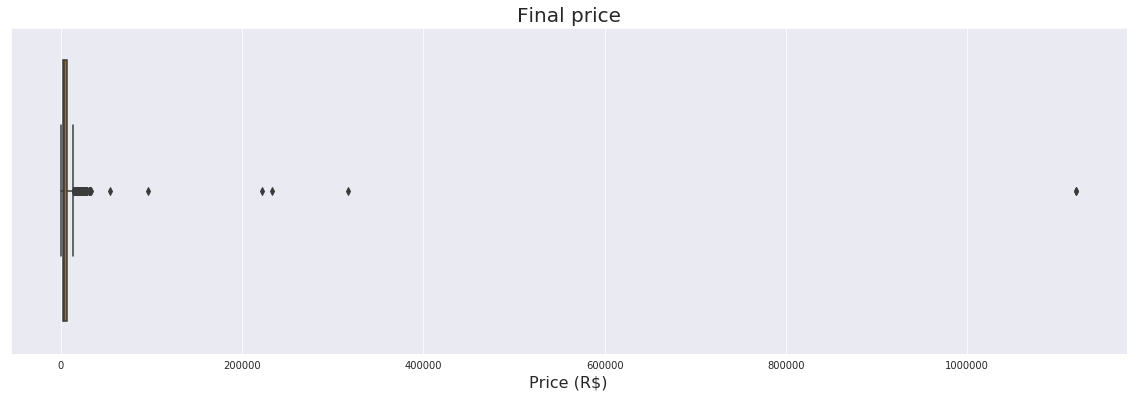

In [21]:
ax = sns.boxplot(df['total (R$)'])
ax.figure.set_size_inches(20,6)
ax.set_title('Final price', fontsize=20)
ax.set_xlabel('Price (R$)', fontsize=16)
ax;

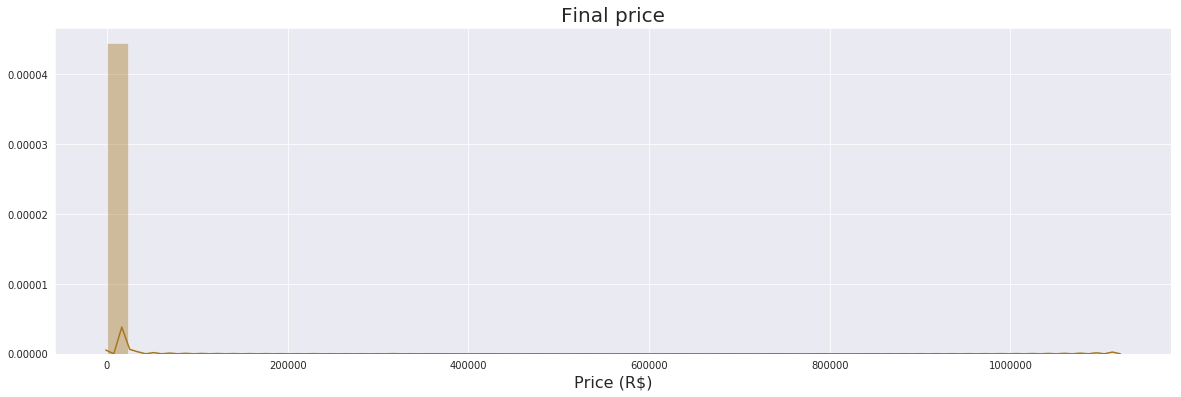

In [22]:
ax = sns.distplot(df['total (R$)'])
ax.figure.set_size_inches(20,6)
ax.set_title('Final price', fontsize=20)
ax.set_xlabel('Price (R$)', fontsize=16)
ax;

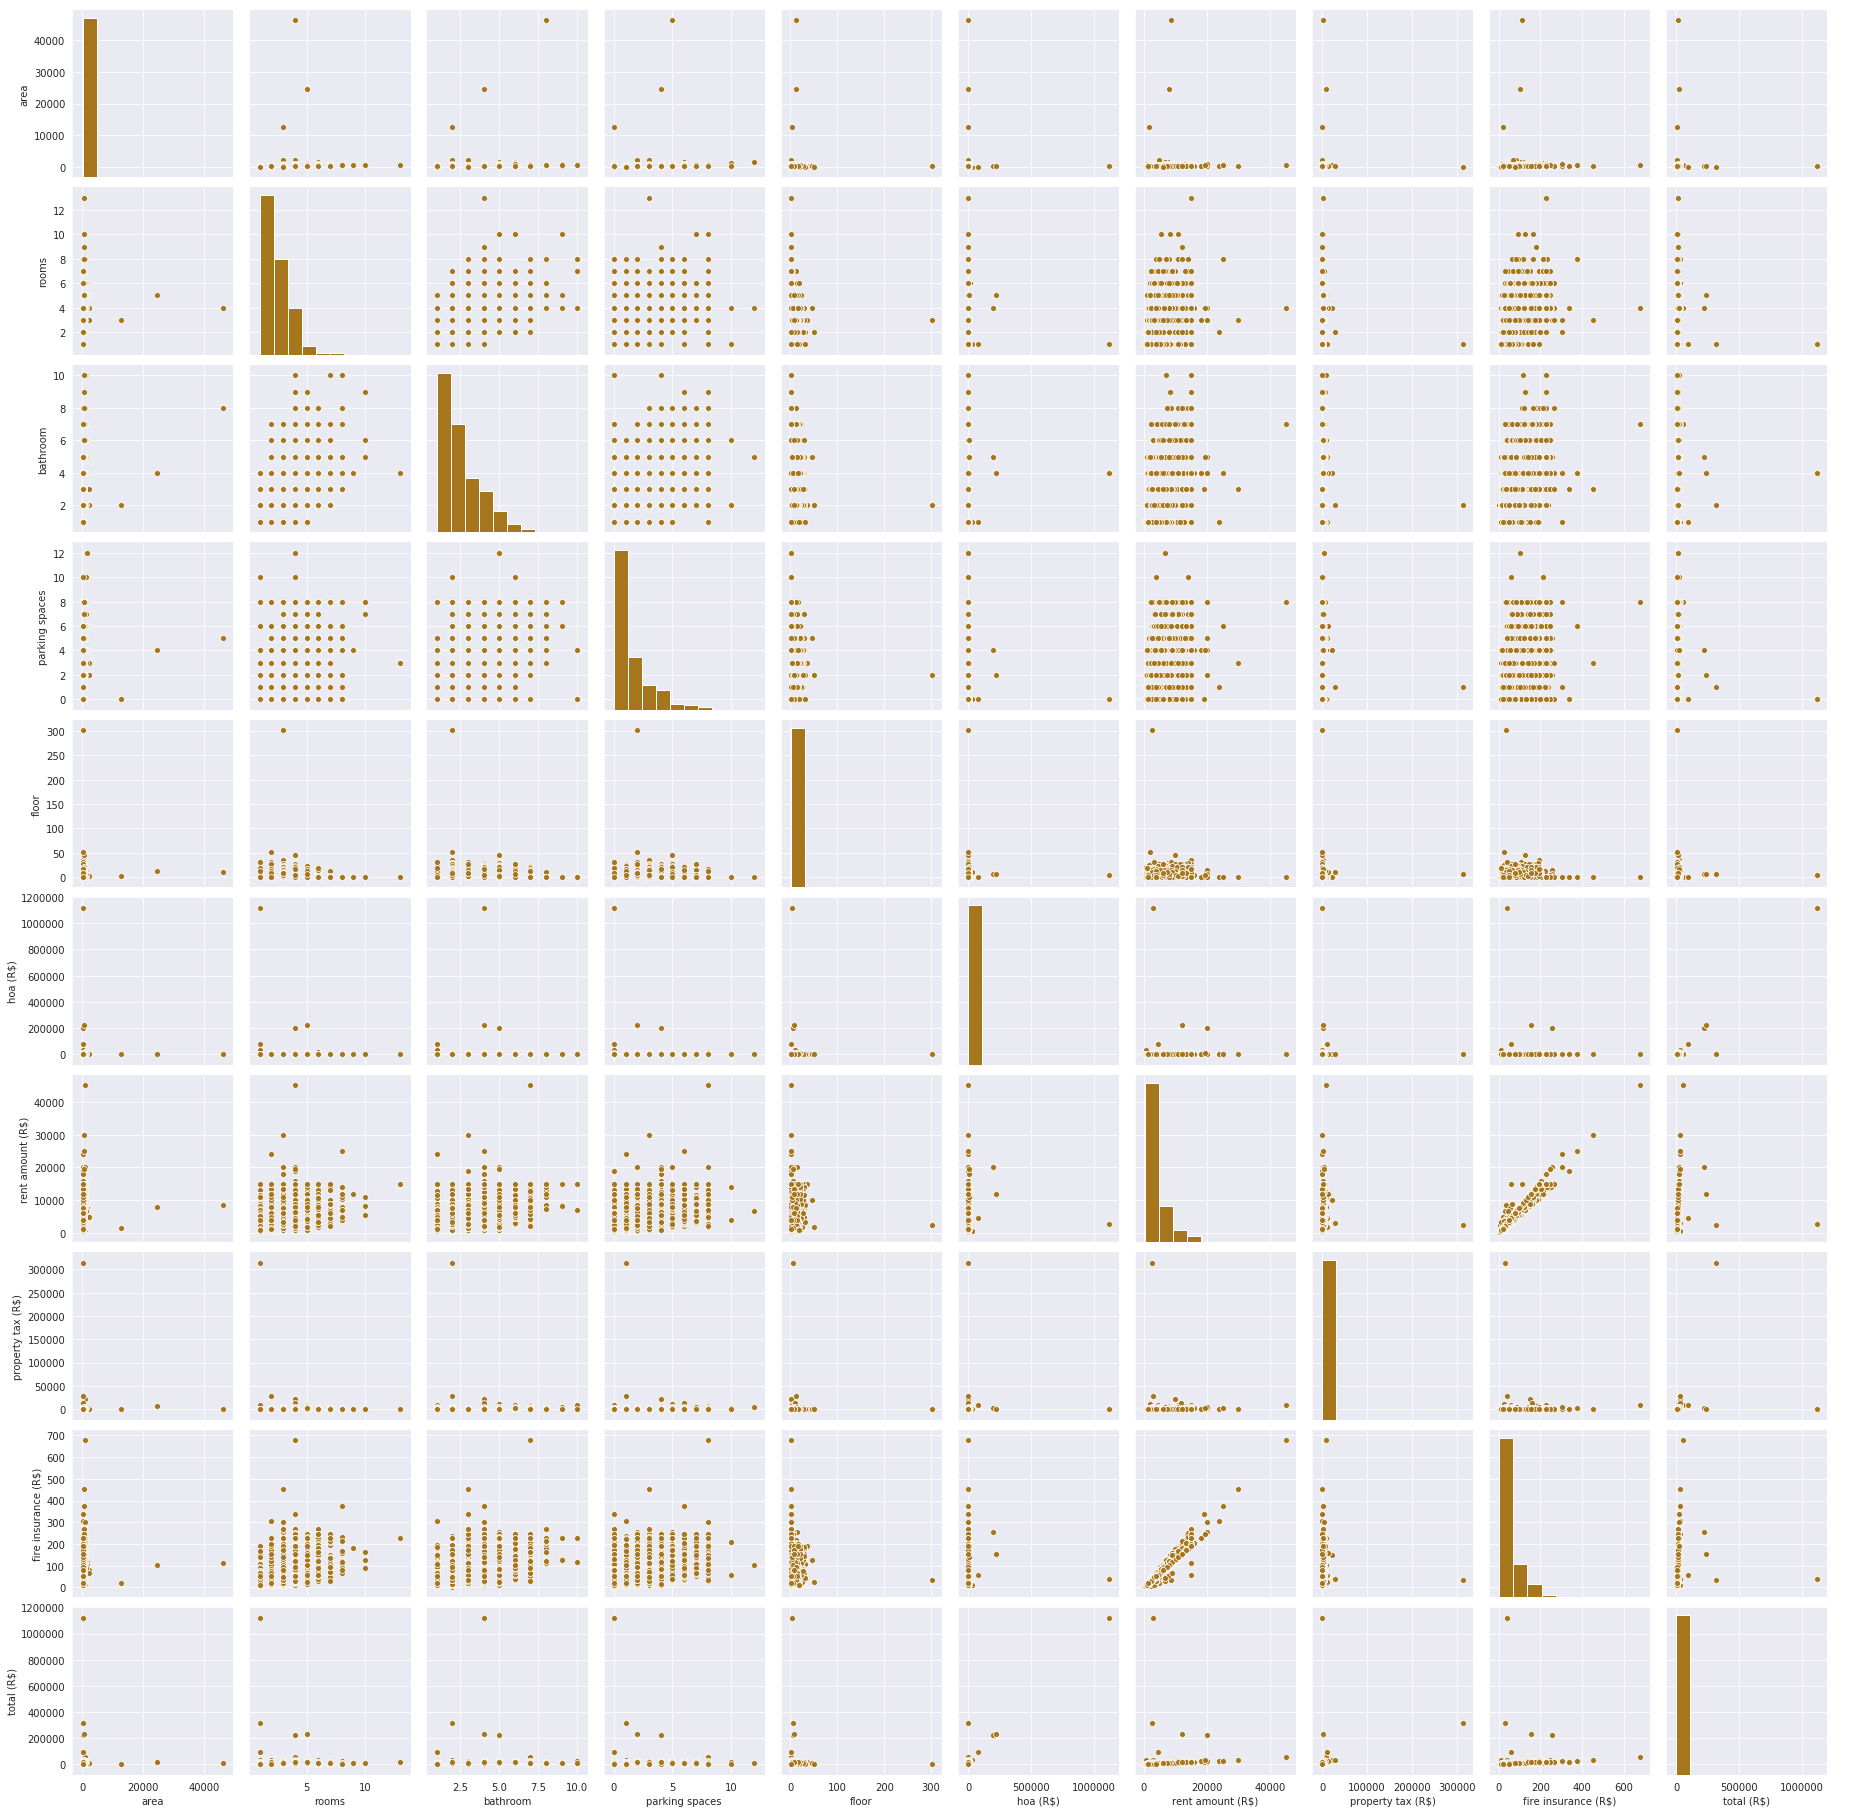

In [23]:
sns.pairplot(df);

#### Let's see the last line closer

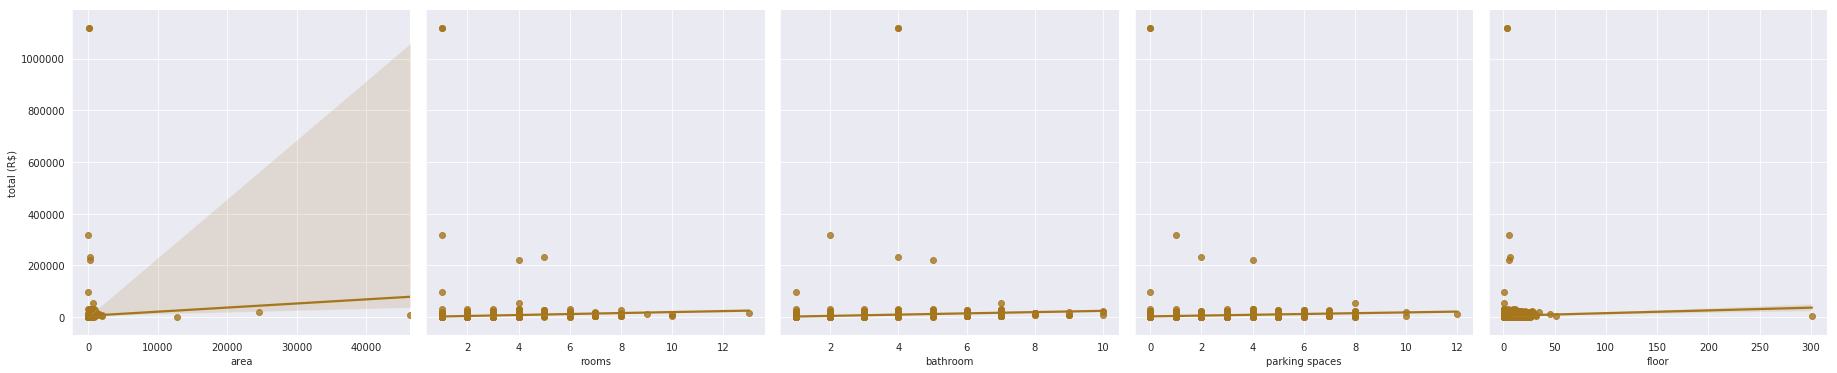

In [24]:
ax = sns.pairplot(df, y_vars='total (R$)', x_vars=['area', 'rooms', 'bathroom', 'parking spaces', 'floor'], height=5, kind='reg')
ax;

#### There is some outliers, mostly in the area columns that make more difficult have a good analysis visualization.

-----------------------------------------------------------------------------------------------------

#### Checking outliers

In [25]:
#Area outliers
np.sort(df['area'].unique())[-20:]

array([  834,   840,   845,   850,   856,   884,   890,   900,   950,
         981,   998,   999,  1000,  1020,  1100,  1600,  2000, 12732,
       24606, 46335])

In [26]:
df[df['area']>1000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
654,São Paulo,1600,6,6,6,1,acept,furnished,0,7600,1834,115,9549
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
2423,Belo Horizonte,1020,5,4,6,1,acept,furnished,0,6520,654,107,7281
3559,São Paulo,1100,4,6,10,1,acept,not furnished,3000,14000,2000,211,19210
4813,São Paulo,1600,4,5,12,1,acept,not furnished,1,6900,5000,104,12010
5129,Belo Horizonte,2000,4,2,3,1,acept,not furnished,0,4956,200,82,5238
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
8790,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200,67,8267
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


In [27]:
df.drop(df[df['area']>1000].index, inplace = True)

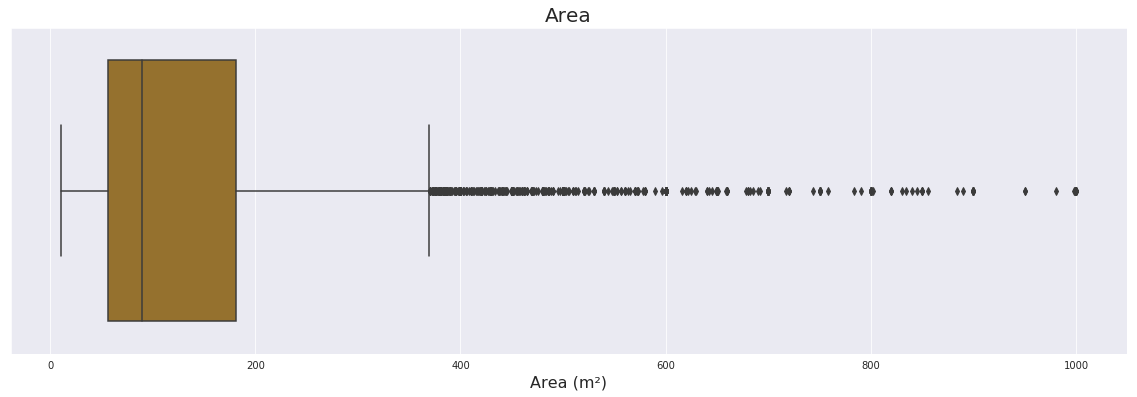

In [28]:
ax = sns.boxplot(df['area'])
ax.figure.set_size_inches(20,6)
ax.set_title('Area', fontsize=20)
ax.set_xlabel('Area (m²)', fontsize=16)
ax;

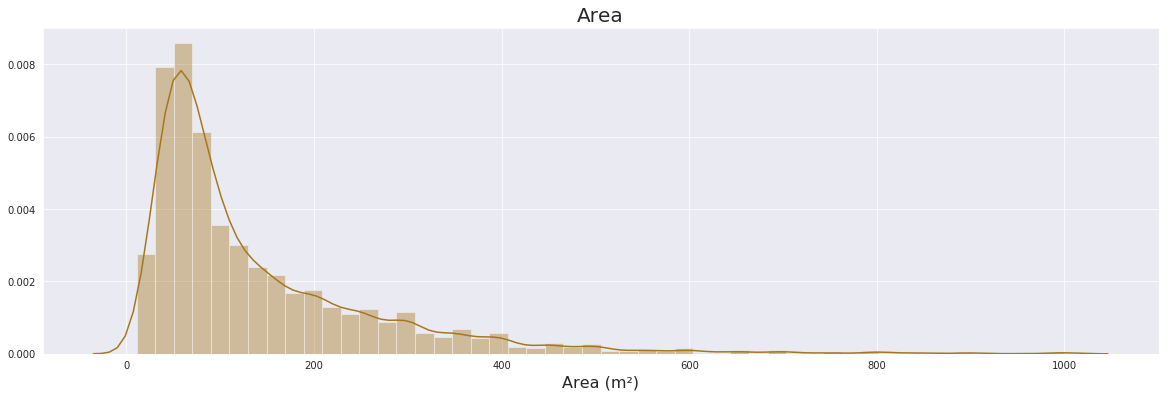

In [29]:
ax = sns.distplot(df['area'])
ax.figure.set_size_inches(20,6)
ax.set_title('Area', fontsize=20)
ax.set_xlabel('Area (m²)', fontsize=16)
ax;

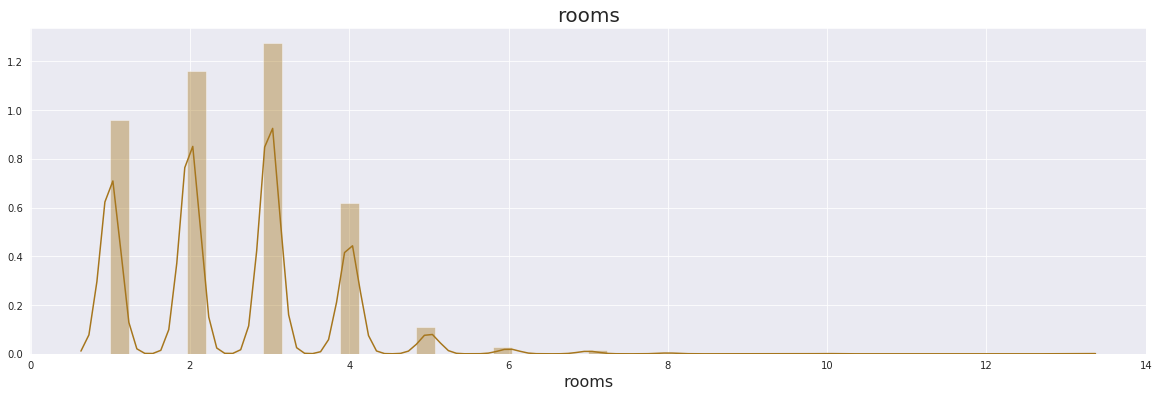

In [30]:
ax = sns.distplot(df['rooms'])
ax.figure.set_size_inches(20,6)
ax.set_title('rooms', fontsize=20)
ax.set_xlabel('rooms', fontsize=16)
ax;

In [31]:
#Total outliers
print('Highest prices')
print(np.sort(df['total (R$)'].unique())[-50:])
print('---------------------------------------------------')
print('Total price describe')
print(df['total (R$)'].describe().round(2))

Highest prices
[  22630   22720   22740   22760   22770   22790   23120   23130   23160
   23250   23570   23590   23620   23680   23690   23780   23870   23980
   24110   24530   24880   24890   24910   25180   25310   25390   25510
   25580   26090   26800   27290   27580   27760   27830   27840   28310
   28490   28790   30660   31010   31580   32040   32180   32750   54430
   95610  222100  233200  316900 1120000]
---------------------------------------------------
Total price describe
count      10683.00
mean        5486.45
std        16490.38
min          499.00
25%         2060.50
50%         3578.00
75%         6759.50
max      1120000.00
Name: total (R$), dtype: float64


In [32]:
df.drop(df[df['total (R$)']>20000].index, inplace = True)

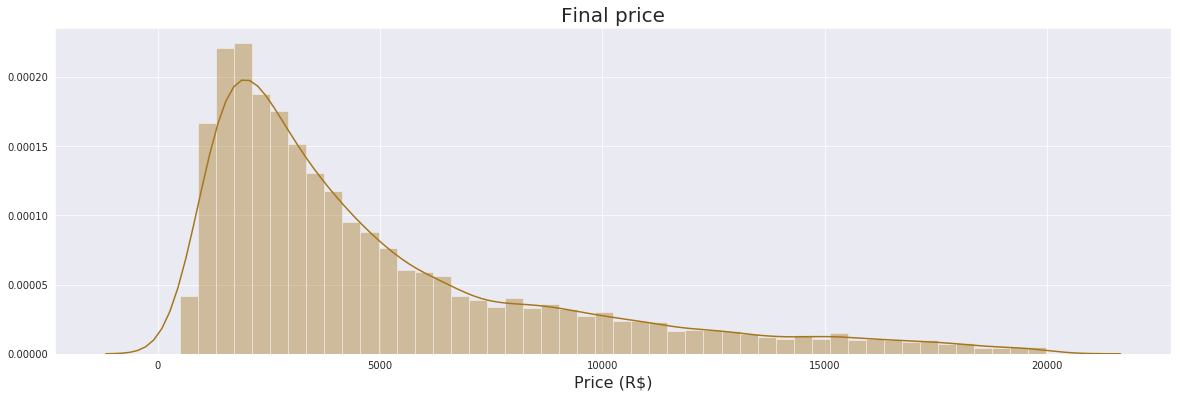

In [33]:
ax = sns.distplot(df['total (R$)'])
ax.figure.set_size_inches(20,6)
ax.set_title('Final price', fontsize=20)
ax.set_xlabel('Price (R$)', fontsize=16)
ax;

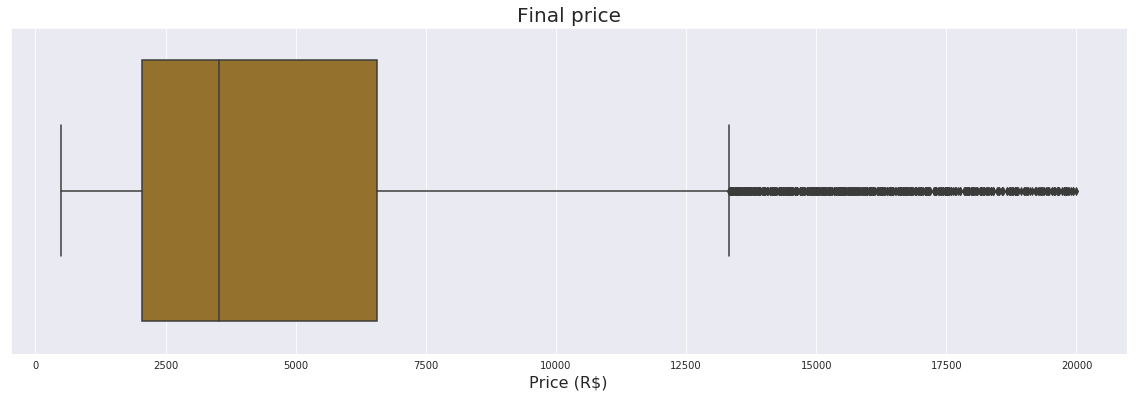

In [34]:
ax = sns.boxplot(df['total (R$)'])
ax.figure.set_size_inches(20,6)
ax.set_title('Final price', fontsize=20)
ax.set_xlabel('Price (R$)', fontsize=16)
ax;

#### The visualization is much better now

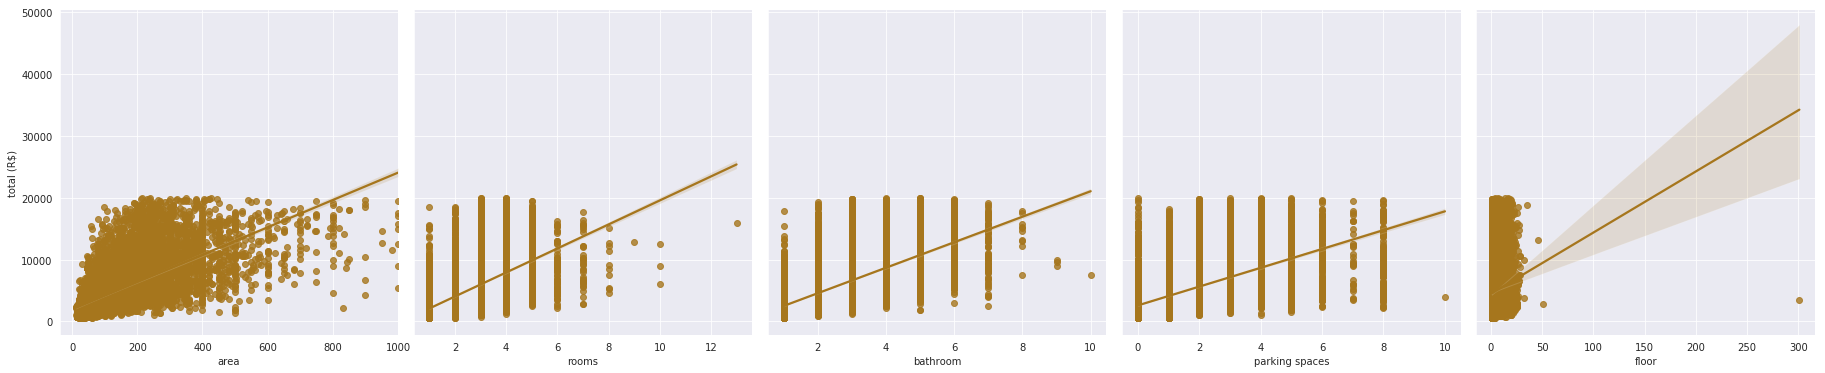

In [35]:
#Checking the last pairplot line again
ax = sns.pairplot(df, y_vars='total (R$)', x_vars=['area', 'rooms', 'bathroom', 'parking spaces', 'floor'], height=5, kind='reg')
ax;

----------------------------------------------------------------------------

#### Let's see first a correlation between columns

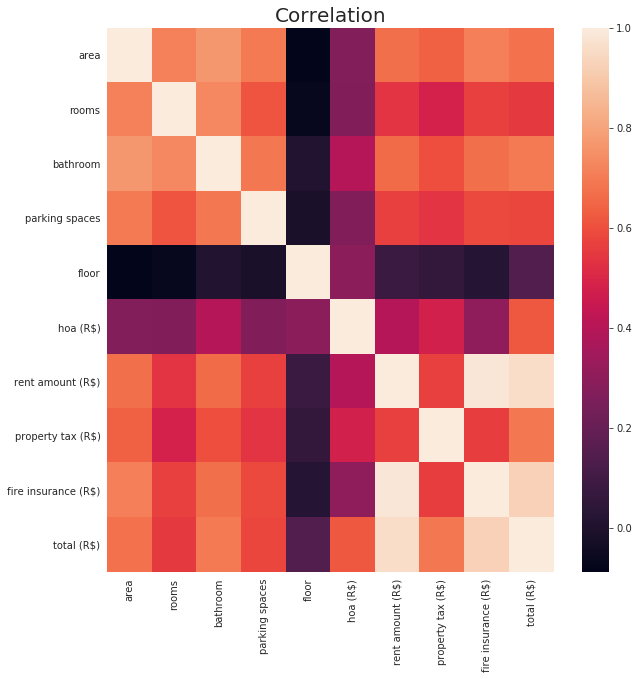

In [36]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr())
ax.set_title('Correlation', fontsize=20)
ax;

#### *Although the correlation between hoa column and total columns is 0.955, this doesn't mean hoa column is a good approach to estimate total column. Total column values is a sum of hoa, rent amount, property tax and fire insurance values. All of then is already calculated based on the remain columns, so We only will have hoa column at the same time we have total column. However, It is possible to try to estimate the columns that generate total values with the remaining columns. <p><br> Usually, the rent amount is the main column for caculate other fees. And It's easier to see a correlation between rent amount and not prices columns.*

In [37]:
df.city.unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [38]:
city_test = pd.get_dummies(df) #Let's see what city is the most expensive
city_test.corr().head(15)

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,animal_not acept,furniture_furnished,furniture_not furnished
area,1.000000,0.711430,0.769888,0.696070,-0.087084,0.273317,0.669395,0.634854,0.708117,0.676857,0.083739,-0.035313,-0.097590,-0.107315,0.102178,0.129285,-0.129285,-0.012995,0.012995
rooms,0.711430,1.000000,0.731259,0.612103,-0.069663,0.269106,0.539197,0.483684,0.563145,0.553939,0.165258,-0.034717,-0.106826,-0.087398,0.040960,0.171326,-0.171326,-0.083858,0.083858
bathroom,0.769888,0.731259,1.000000,0.691328,0.011748,0.395900,0.662528,0.597750,0.670222,0.697049,0.045955,-0.053370,-0.125483,-0.135082,0.173693,0.116642,-0.116642,0.017528,-0.017528
parking spaces,0.696070,0.612103,0.691328,1.000000,-0.011179,0.266173,0.566617,0.540256,0.586863,0.581805,0.084784,-0.003570,-0.122781,-0.218722,0.178132,0.124176,-0.124176,-0.006281,0.006281
floor,-0.087084,-0.069663,0.011748,-0.011179,1.000000,0.295579,0.078932,0.058798,0.021767,0.142647,-0.075011,-0.037621,-0.072844,0.003080,0.113298,-0.020303,0.020303,0.102071,-0.102071
hoa (R$),0.273317,0.269106,0.395900,0.266173,0.295579,1.000000,0.393349,0.480398,0.305225,0.618209,-0.125195,-0.072287,-0.146017,0.057309,0.173298,0.015318,-0.015318,0.138871,-0.138871
rent amount (R$),0.669395,0.539197,0.662528,0.566617,0.078932,0.393349,1.000000,0.568738,0.986398,0.960622,-0.019735,-0.131786,-0.162271,-0.074423,0.240048,0.064200,-0.064200,0.176586,-0.176586
property tax (R$),0.634854,0.483684,0.597750,0.540256,0.058798,0.480398,0.568738,1.000000,0.559377,0.692153,-0.038540,-0.094494,-0.132088,-0.065697,0.206554,0.073456,-0.073456,0.038529,-0.038529
fire insurance (R$),0.708117,0.563145,0.670222,0.586863,0.021767,0.305225,0.986398,0.559377,1.000000,0.927076,0.009406,-0.127809,-0.122786,-0.088396,0.203688,0.076443,-0.076443,0.151566,-0.151566
total (R$),0.676857,0.553939,0.697049,0.581805,0.142647,0.618209,0.960622,0.692153,0.927076,1.000000,-0.051138,-0.134035,-0.180740,-0.052980,0.258348,0.063839,-0.063839,0.179125,-0.179125


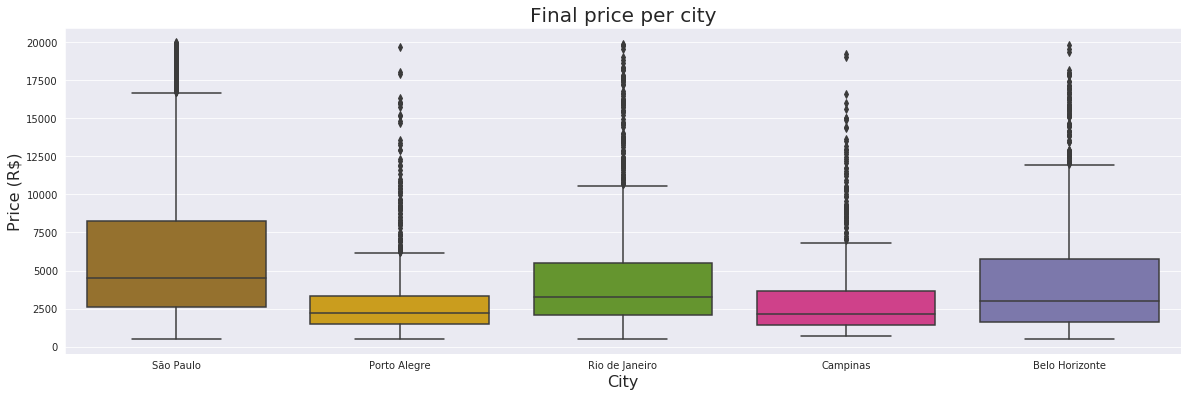

In [39]:
ax = sns.boxplot(data = df, x = 'city', y = 'total (R$)', orient = 'v')
ax.figure.set_size_inches(20,6)
ax.set_title('Final price per city', fontsize=20)
ax.set_xlabel('City', fontsize=16)
ax.set_ylabel('Price (R$)', fontsize=16)
ax;

#### *It's easy to see that São Paulo is the most expensive city to live.*

### See you at the next notebook to build a predictive model for this dataset

____________________________________________________________________________________________________